In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data
There are 1460 samples, where each contains 79 features and 1 sale price.

In [44]:
houses = pd.read_csv('./dataset/train.csv')
houses.shape
houses.columns
# distinguish categorical and numerical features
categorical_features = houses.select_dtypes(include = ["object"]).columns
numerical_features = houses.select_dtypes(exclude = ["object"]).columns

In [46]:
categorical_features
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Use statistic plots to see some internal relationship.

- Saleprice in 2008 is relatively low compared to other years due to economic recession.
- Inflation effect can by taken into consideration?

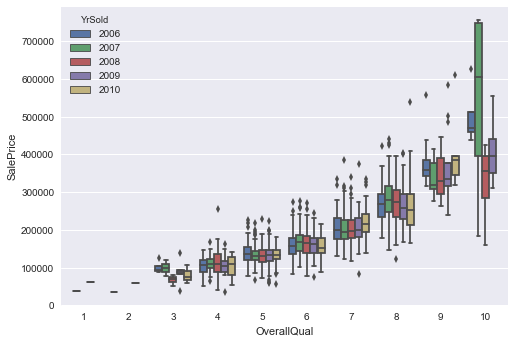

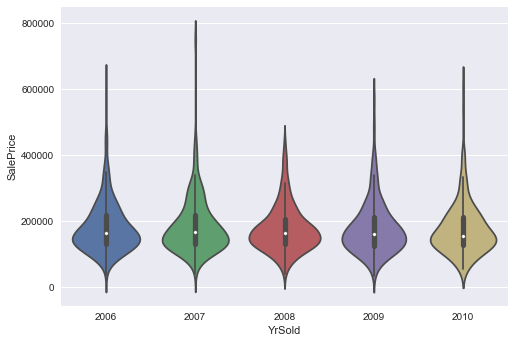

In [3]:
plt.figure()
sns.boxplot(x='OverallQual',y='SalePrice',hue='YrSold',data=houses)
plt.figure()
sns.violinplot(x='YrSold',y='SalePrice',data=houses)

## Most important factor to affect SalePrice
  - OverallQual: exponential
  - GrLivArea: linear/exponential
  - GarageCars: skewed normal
  - GarageArea
  - TotalBsmtSF: linear?
  - 1stFlrSF

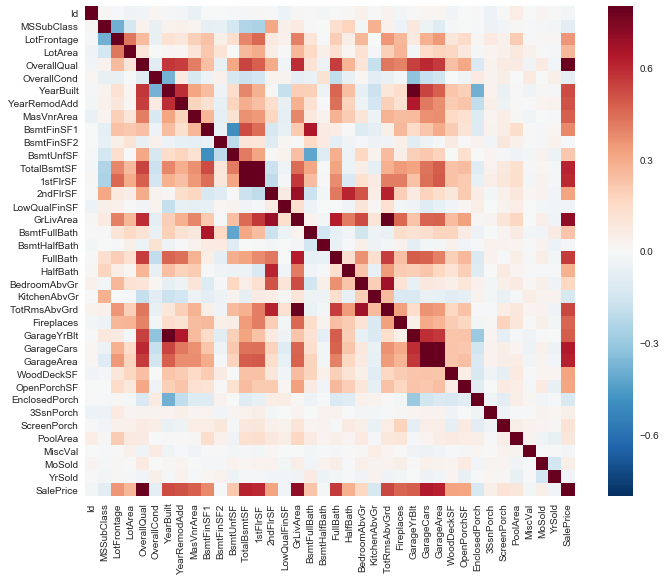

In [4]:
corrmat = houses.corr() #correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [5]:
corrmat['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

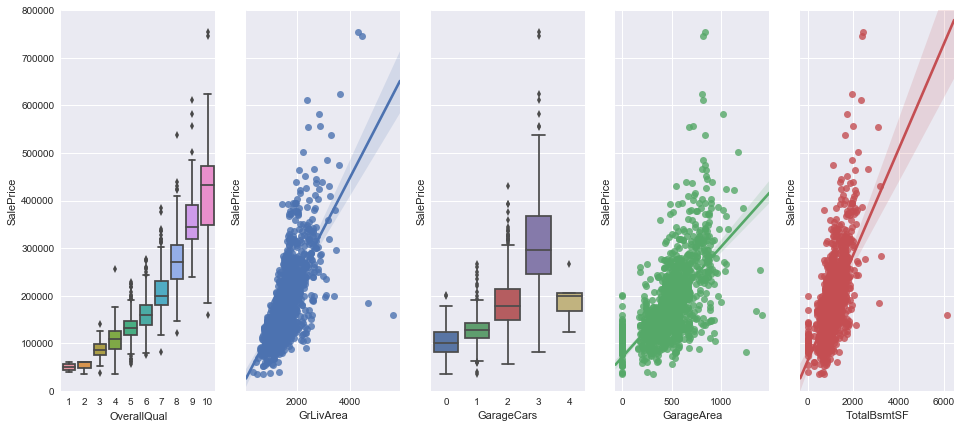

In [6]:
f,axarr = plt.subplots(1,5,sharey='row',figsize=(16,7))
sns.boxplot(x='OverallQual',y='SalePrice',data=houses,ax=axarr[0])
sns.regplot(x='GrLivArea',y='SalePrice',data=houses,ax=axarr[1])
sns.boxplot(x='GarageCars',y='SalePrice',data=houses,ax=axarr[2])
sns.regplot(x='GarageArea',y='SalePrice',data=houses,ax=axarr[3])
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=houses,ax=axarr[4])
plt.ylim((0,800000));

## Some variables are highly dependent
  - GarageYrBlt~YearBuilt
  - TotalBsmtSF~1stFlrSF
  - GrLivArea~TotRmsAbvGrd(~BedroomAbvGr)
  - GarageCars~GarageArea
  - OverallQual~GrLivArea, FullBath, GarageCars, GarageArea, GarageYrBlt/YearBuilt
  - 1stFlrSF+2ndFlrSF~GrLivArea
  - BsmtFinSF1+BsmtFinSF2+BsmtUnfSF=TotalBsmtSF

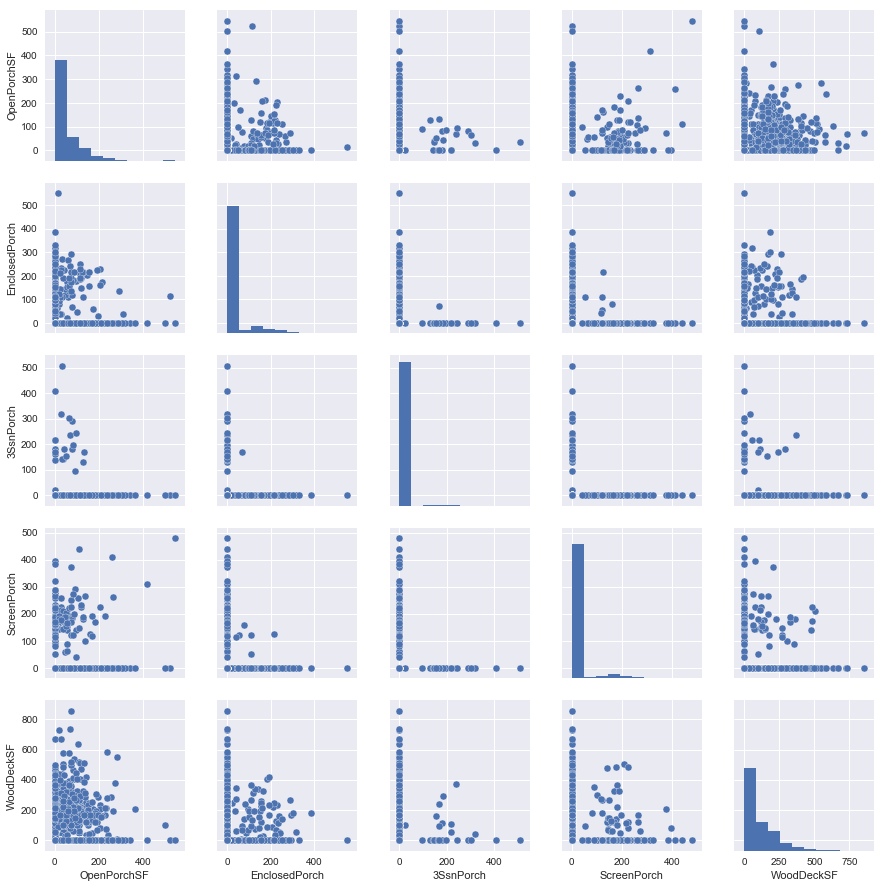

In [17]:
sns.pairplot(vars=['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','WoodDeckSF'],data=houses)

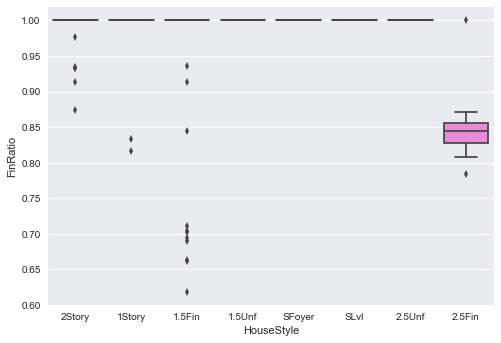

In [25]:
houses['FinRatio'] = 1-houses['LowQualFinSF']/houses['GrLivArea']
sns.boxplot(y='FinRatio',x='HouseStyle',data=houses)

count    1460.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

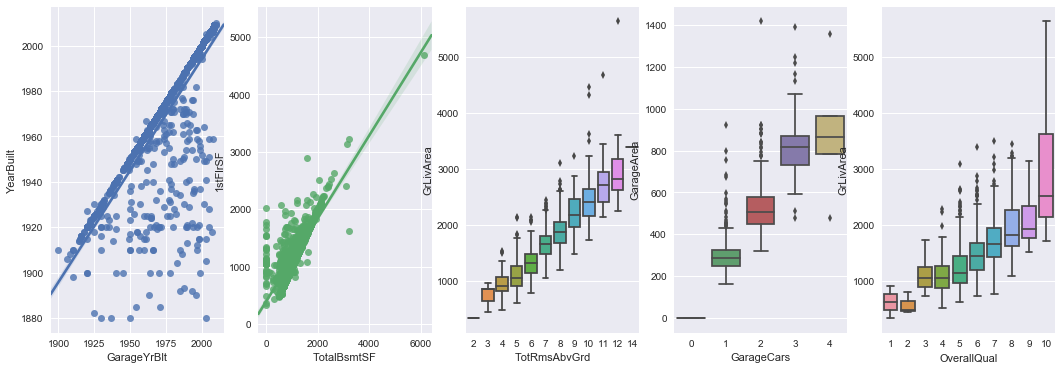

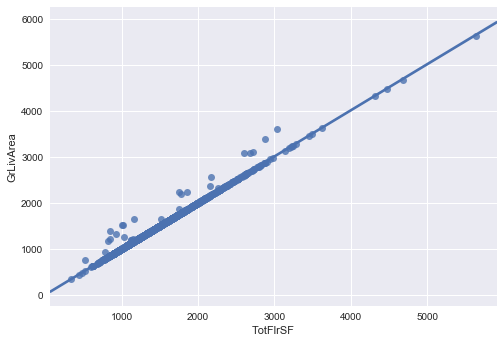

In [8]:
f,axarr = plt.subplots(1,5,figsize=(18,6))
sns.regplot(x='GarageYrBlt',y='YearBuilt',data=houses,ax=axarr[0])
sns.regplot(x='TotalBsmtSF',y='1stFlrSF',data=houses,ax=axarr[1])
sns.boxplot(x='TotRmsAbvGrd',y='GrLivArea',data=houses,ax=axarr[2])
sns.boxplot(x='GarageCars',y='GarageArea',data=houses,ax=axarr[3])
sns.boxplot(x='OverallQual',y='GrLivArea',data=houses,ax=axarr[4])
houses['TotFlrSF'] = pd.Series(houses['1stFlrSF']+houses['2ndFlrSF'])
# +houses['WoodDeckSF']+houses['OpenPorchSF']
plt.figure()
sns.regplot(x='TotFlrSF',y='GrLivArea',data=houses)
(houses['BsmtFinSF1'] + houses['BsmtFinSF2']+ houses['BsmtUnfSF']-houses['TotalBsmtSF']).describe()

# Missing data

- PoolQC: no pool (1453)
- MiscFeature: use MiscVal instead (1406)
- Alley: no access (1369)
- Fence: no fence (1179)
- FireplaceQu: no fireplace (690)
- LotFrontage: **missing data** (259)
- BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2, BsmtExposure: no basement, only one house with missing BsmtExposure&BsmtFinType2 (37/38)
- GarageCond, GarageType, GarageYrBlt, GarageFinish, GarageQual: no garage (81)
- MasVnrArea, MasVnrType: **missing data** (8)
- Electrical: **missing data** (1)

In [9]:
houses.isnull().any() 
houses.isnull().sum().sort_values(ascending=False) # for each feature, how many samples are missing this feature

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageCond         81
GarageFinish       81
GarageType         81
GarageYrBlt        81
BsmtExposure       38
BsmtFinType2       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofStyle           0
RoofMatl            0
ExterQual           0
Exterior1st         0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
TotFlrSF            0
OverallCond         0
                 ... 
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
ScreenPorch         0
Functional          0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
Fireplaces          0
TotRmsAbvGrd        0
BsmtUnfSF           0
LowQualFin

#### Remove the sample with missing Electrical informaiton

In [10]:
idx_naElectrical = houses.loc[houses['Electrical'].isnull()].index
houses = houses.drop(idx_naElectrical)

#### Replace NAs with more meaningful description
Alternative method, eliminating the features that have too many NAs  
```python
houses = houses.drop(['PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],1)
```

- [x] **MasVnr** feature needs to be revisited.
- [x] **LowQualFinSF** should be discard?

In [11]:
# use 'MiscVal' instead
houses = houses.drop('MiscFeature',1)
# use 'GarageArea' instead
houses = houses.drop('GarageCars',1)
# pool quality
houses['PoolQC'] = houses['PoolQC'].fillna('None')
# alley access
houses['Alley'] = houses['Alley'].fillna('None')
# fence
houses['Fence'] = houses['Fence'].fillna('None')
# fireplace
houses['FireplaceQu'] = houses['FireplaceQu'].fillna('None')
# garage
houses['GarageCond'] = houses['GarageCond'].fillna('None')
houses['GarageType'] = houses['GarageType'].fillna('None')
houses['GarageYrBlt'] = houses['GarageYrBlt'].fillna('None')
houses['GarageFinish'] = houses['GarageFinish'].fillna('None')
houses['GarageQual'] = houses['GarageQual'].fillna('None')
# basement, only one house with missing BsmtExposure&BsmtFinType2
houses['BsmtQual'] = houses['BsmtQual'].fillna('None')
houses['BsmtCond'] = houses['BsmtCond'].fillna('None')
houses['BsmtFinType1'] = houses['BsmtFinType1'].fillna('None')
houses['BsmtFinType2'] = houses['BsmtFinType2'].fillna('None')
houses['BsmtExposure'] = houses['BsmtExposure'].fillna('None')
# distance from the connected street, fill NA with average number
houses['LotFrontage'] = houses['LotFrontage'].fillna(70)
# masonry veneer 
houses['MasVnrArea'] = houses['MasVnrArea'].fillna(0)
houses['MasVnrType'] = houses['MasVnrType'].fillna('None')

#### Encode numerical numbers which represent category features

In [12]:
houses = houses.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

#### Encode category features as ordered numbers

In [13]:
houses = houses.replace({
                        "Street" : {"Grvl" : 1, "Pave" : 2},
                        "Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2},
                        "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                        "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                        "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                        "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                        "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                        "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                        "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                        "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "GarageFinish" : {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                        "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                        "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
    
                        "Fence" : {"None" : 0, "MnWw" : 1, "MnPrv" : 1, "GdWo" : 2, "GdPrv" : 2}
#                         "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}
})

## Preprocessing data

- Drop the outliers with higher GrLivArea and cheaper SalePrice
  - remove houses with GrLivArea>4000, as [recommended](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf)
- Normalize SalePrice to zero mean, unit variance
  - There are several outliers with higher SalePrice

In [14]:
houses = houses[houses['GrLivArea']<4000]
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

C:\Users\Shuyang\Anaconda2\envs\tensorflow-jupyter\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


(array([  96.,  539.,  444.,  211.,   96.,   37.,   20.,    6.,    3.,    3.]),
 array([-1.89397316, -1.12457063, -0.3551681 ,  0.41423442,  1.18363695,
         1.95303948,  2.72244201,  3.49184453,  4.26124706,  5.03064959,
         5.80005212]),
 <a list of 10 Patch objects>)

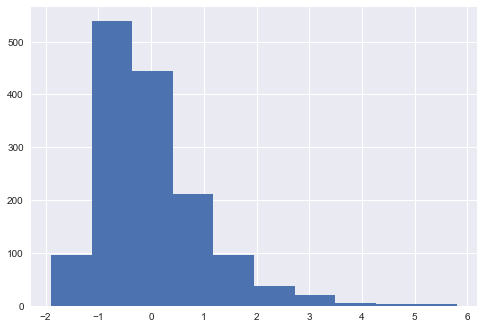

In [15]:
from sklearn import preprocessing
SalePrice_scaled = preprocessing.scale(houses['SalePrice'])
SalePrice_scaled.mean()
SalePrice_scaled.std()
plt.hist(SalePrice_scaled)

#### Create new features
- simplifications
- combinations

In [37]:
# transform features
logSalePrice = pd.Series(np.log(houses['SalePrice']))
# houses['FinRatio'] = 1-houses['LowQualFinSF']/houses['GrLivArea']
train = pd.DataFrame(index=houses.index, columns=[])
# combine features
train['logSalePrice'] = np.log(houses['SalePrice'])
train['Overall'] = houses['OverallQual'] * houses['OverallCond']
train['Pool'] = houses['PoolQC'] * houses['PoolArea']
train['Exter'] = houses['ExterQual'] * houses['ExterCond']
train['Kitchen'] = houses['KitchenAbvGr'] * houses['KitchenQual']
train['Garage'] = houses['GarageQual'] * houses['GarageCond'] * houses['GarageFinish'] * houses['GarageArea']
train['Fireplace'] = houses['Fireplaces'] * houses['FireplaceQu']
train['Basement'] = houses['BsmtQual'] * houses['BsmtCond'] * (houses['BsmtFinType1']*houses['BsmtFinSF1']+houses['BsmtFinType2']*houses['BsmtFinSF2'])
train['OpenAreaSF'] = houses['WoodDeckSF'] + houses['OpenPorchSF'] + houses['EnclosedPorch'] + houses['3SsnPorch'] + houses['ScreenPorch']
train['TotBath'] = houses["BsmtFullBath"] + (0.5 * houses["BsmtHalfBath"]) + houses["FullBath"] + (0.5 * houses["HalfBath"])
train['TotSF'] = houses['GrLivArea'] + houses['TotalBsmtSF']
train[1:5]

,logSalePrice,Overall,Pool,Exter,Kitchen,Garage,Fireplace,Basement,OpenAreaSF,TotBath,TotSF
1,12.109011,48,0,9,3,8280,3,58680,298,2.5,2524
2,12.317167,35,0,12,4,10944,3,34992,42,3.5,2706
3,11.849398,35,0,9,4,5778,4,12960,307,2.0,2473
4,12.429216,40,0,12,4,15048,3,47160,276,3.5,3343


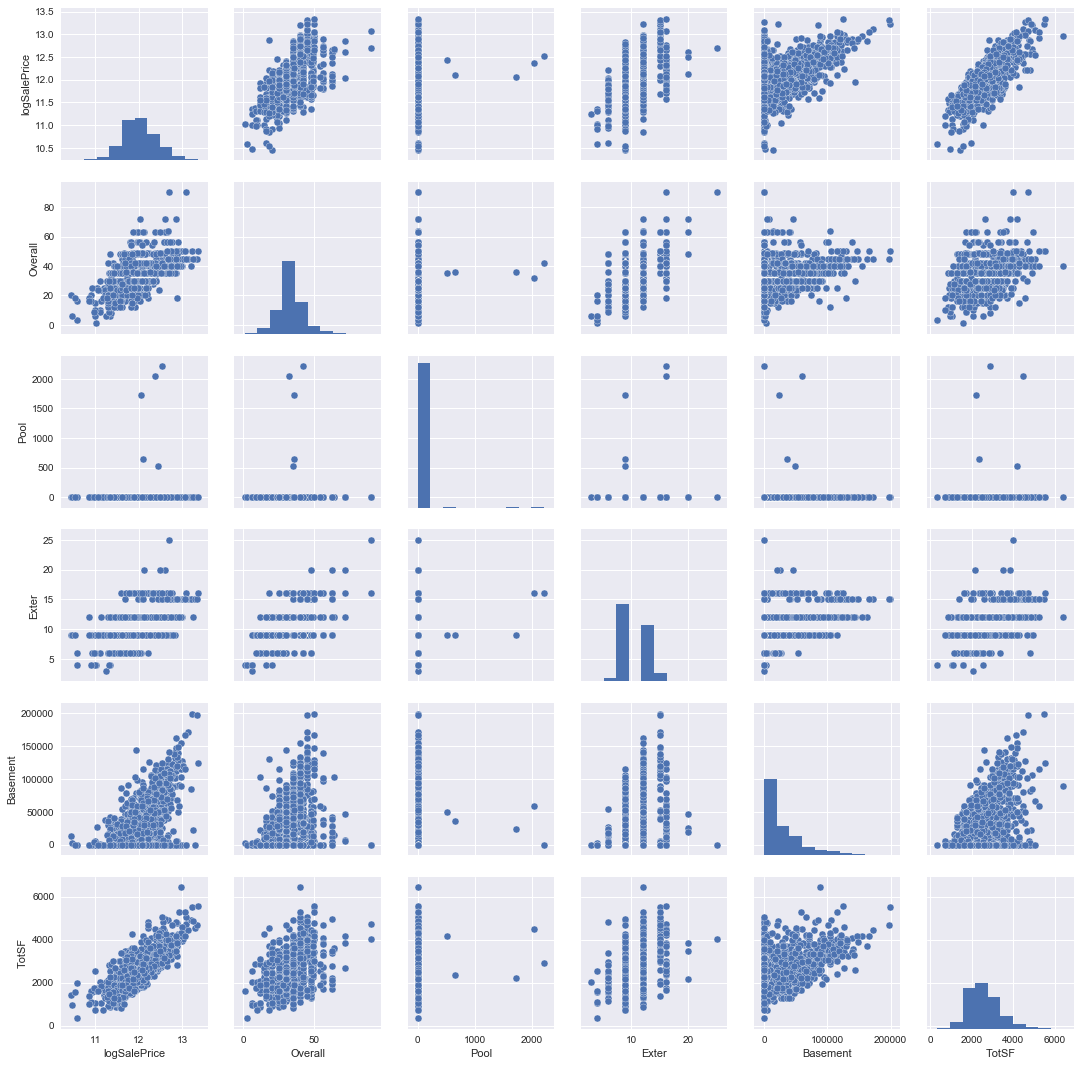

In [40]:
sns.pairplot(vars=['logSalePrice','Overall','Pool','Exter','Basement','TotSF'],data=train)

In [43]:
corrmat = train.corr()
# corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corrmat['logSalePrice'].sort_values(ascending = False)

logSalePrice    1.000000
TotSF           0.817579
Garage          0.704813
TotBath         0.672958
Overall         0.604494
Exter           0.587532
Fireplace       0.518335
Basement        0.503286
Kitchen         0.402292
OpenAreaSF      0.398709
Pool            0.039567
Name: logSalePrice, dtype: float64

#### Log transform of the skewed numerical features to lessen impact of outliers
As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed

In [55]:
train['TotSF'] = np.log(train['TotSF'])
train['Basement'] = np.log1p(train['Basement'])
train['Garage'] = np.log1p(train['Garage'])

#### Transform some interested variables to normal distribution.

In [ ]:
sns.distplot(houses['SalePrice'], bins=40, hist=True, kde=True, rug=False, fit=stats.norm, vertical=False)
plt.figure()
sns.distplot(np.log(houses['SalePrice']), bins=40, hist=True, kde=True, rug=False, fit=stats.norm, vertical=False)

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(houses['GrLivArea'], bins=40, hist=True, kde=True, rug=False, fit=stats.norm, vertical=False)
plt.subplot(1,2,2)
sns.distplot(np.log(houses['GrLivArea']), bins=40, hist=True, kde=True, rug=False, fit=stats.norm, vertical=False)
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(houses['1stFlrSF'], bins=40, hist=True, kde=True, rug=False, fit=stats.norm, vertical=False)
plt.subplot(1,2,2)
sns.distplot(np.log(houses['1stFlrSF']), bins=40, hist=True, kde=True, rug=False, fit=stats.norm, vertical=False)
# plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
# sns.distplot(houses['OverallQual'], bins=40, hist=True, kde=True, rug=False, fit=stats.norm, vertical=False)
# plt.subplot(1,2,2)
# sns.distplot(np.log(houses['OverallQual']), bins=40, hist=True, kde=True, rug=False, fit=stats.norm, vertical=False)

In [ ]:
df_train = pd.get_dummies(houses)
df_train[1:5]

# Regression

In [48]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import preprocessing

### Partion the data into training set and testing set

In [56]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train.drop('logSalePrice',1), train['logSalePrice'], test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1018, 10)
X_test : (437, 10)
y_train : (1018,)
y_test : (437,)


In [50]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

### Linear Regression

In [57]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

RMSE on Training set : 0.162309386322
RMSE on Test set : 0.170617340225


### Ridge Regression

In [58]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

Best alpha : 1.0
Try again for more precision with alphas centered around 1.0
Best alpha : 0.65
Ridge RMSE on Training set : 0.162297948131
Ridge RMSE on Test set : 0.17073311551


### LASSO Regression

In [59]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

Best alpha : 0.0006
Try again for more precision with alphas centered around 0.0006
Best alpha : 0.00057
Lasso RMSE on Training set : 0.162324983531
Lasso RMSE on Test set : 0.170608074762
